# DESTEK VEKTÖR MAKİNELERİ (SVM)

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix,accuracy_score,roc_auc_score,roc_curve,classification_report
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error,r2_score


In [2]:
import warnings                                                # eskime ve özellik uyarılarını görmemek için !
warnings.filterwarnings("ignore",category=DeprecationWarning)
warnings.filterwarnings("ignore",category=FutureWarning)

* Veri setini okuma

In [2]:
df=pd.read_csv("diabetes.csv")

* Veri setinin ilk 5 satırını görme

In [3]:
df.head()    

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df["Outcome"].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

* bagımlı degiskenimizi y ye atıyoruz

In [5]:
y=df["Outcome"]               

* Bagımlı degiskenin dısında kalan degiskenleri(bagımsız degiskenleri) X e atıyoruz

In [6]:
X=df.drop(["Outcome"],axis=1)  

In [7]:
y.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

In [8]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


* Veri setini %70 e %30 olacak şekilde test ve train olarak bölüyoruz

In [9]:
X_train,X_test,y_train,y_test=train_test_split(X,                                   
                                               y,
                                              test_size=0.30,
                                              random_state=42)

In [11]:
svm=SVC().fit(X_train,y_train)   

* Veri setini eğitirken optimum sonuca ulaşmak için SVM'nin aldığı parametreler bir sözlük yapısı oluşturularak tanımlandı ve bu parametreler  fit edilirken kullanıldı.

In [13]:
svm_params={"C":np.arange(1,3), "gamma" : ['scale'],
            "kernel":["linear","rbf","poly"]}   

* cv= 5 ile modele 5-katlı cross-validation uyguluyoruz
* n_jobs=-1 ile donanımımızı en yüksek seviyede kullanmamızı sağlıyoruz.
* verbose=2 ile eğitim aşamasının nasıl ilerlediğini görmek istediğimizi belirliyoruz

In [14]:
svm_cv_model=GridSearchCV(svm,svm_params,cv=5,n_jobs=-1,verbose=2).fit(X_train,y_train) 

Fitting 5 folds for each of 6 candidates, totalling 30 fits


* Kullanılan farklı parametreler üzerinden en iyi score elde edildi.

In [15]:
svm_cv_model.best_score_    

0.7839044652128765

* Kullanılan farklı parametreler üzerinden en iyi sonucu veren parametreler elde edildi.

In [16]:
svm_cv_model.best_params_    

{'C': 2, 'gamma': 'scale', 'kernel': 'linear'}

# YORUM
Destek Vektör makineleri kullanılarak diabet veri seti üzerinde bir sınıflandırma yapılmaya çalışıldı. SVM için kullanılan hiperparametreler
svm_params isminde bir sözlük yapısı ile tanımlanıp GridsearchCV metodu ile bu parametreler fit edildi. GridsearchCV metodunda  modelde denenmesi istenen hiperparametreler ve değerleri için bütün kombinasyonlar ile ayrı ayrı model kurulur ve belirtilen metriğe göre en başarılı hiperparametre seti belirlenir. Ben de  bilgisayarımın donanımına göre  C paametresi için 1 ve 2 gamma parametresi için scale kernel parametresi için linear, rbf ve poly değerlerini kullandım. Kurulan model sonucunda en iyi skoru 0.78 ile C:2, gamma:scale, kernel:linear vermiştir.
Bu aşamadan sonra veri setimizi elde ettiğimiz en iyi hiperparametreler ile tekrar fit edip modelimizin sonuçlarına ulaşacağız. 

In [17]:
svm_tuned=SVC(C=2,gamma="scale", kernel="linear").fit(X_train,y_train)

In [18]:
y_pred=svm_tuned.predict(X_test)

In [19]:
accuracy_score(y_test,y_pred)

0.7445887445887446

In [22]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.80      0.81      0.81       151
           1       0.63      0.62      0.63        80

    accuracy                           0.74       231
   macro avg       0.72      0.72      0.72       231
weighted avg       0.74      0.74      0.74       231



[[122  29]
 [ 30  50]]




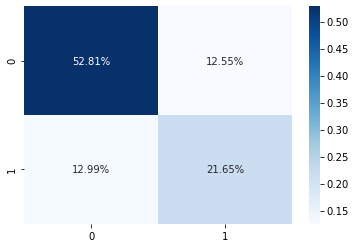

In [25]:
print(confusion_matrix(y_test,y_pred))
print("\n")
svm = sns.heatmap(confusion_matrix(y_test,y_pred)/np.sum(confusion_matrix(y_test,y_pred)), annot=True, 
            fmt='.2%', cmap='Blues')

figure = svm.get_figure()